In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = yf.download('TQQQ', start='2010-2-9')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-02-11,0.813750,0.869792,0.811146,0.865104,0.862942,1728000
2010-02-12,0.841563,0.876146,0.836667,0.868646,0.866475,4300800
2010-02-16,0.889063,0.904375,0.875104,0.902292,0.900037,4809600
2010-02-17,0.914375,0.917813,0.900625,0.917604,0.915311,9590400
2010-02-18,0.916667,0.940521,0.911146,0.935000,0.932663,19430400
...,...,...,...,...,...,...
2021-07-26,136.020004,137.570007,135.039993,137.130005,137.130005,21443700
2021-07-27,136.830002,136.830002,127.830002,132.649994,132.649994,44536200
2021-07-28,133.860001,135.860001,131.270004,134.100006,134.100006,35922300


In [4]:
df['EMA20'] = df['Adj Close'].ewm(20).mean()
df['EMA50'] = df['Adj Close'].ewm(50).mean()

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA20,EMA50
Date,,,,,,,,
2010-02-11,0.813750,0.869792,0.811146,0.865104,0.862942,1728000,0.862942,0.862942
2010-02-12,0.841563,0.876146,0.836667,0.868646,0.866475,4300800,0.864752,0.864726
2010-02-16,0.889063,0.904375,0.875104,0.902292,0.900037,4809600,0.877092,0.876730
2010-02-17,0.914375,0.917813,0.900625,0.917604,0.915311,9590400,0.887357,0.886664
2010-02-18,0.916667,0.940521,0.911146,0.935000,0.932663,19430400,0.897323,0.896232
...,...,...,...,...,...,...,...,...
2021-07-26,136.020004,137.570007,135.039993,137.130005,137.130005,21443700,120.338200,109.132826
2021-07-27,136.830002,136.830002,127.830002,132.649994,132.649994,44536200,120.924475,109.593947
2021-07-28,133.860001,135.860001,131.270004,134.100006,134.100006,35922300,121.551882,110.074458


In [6]:
df = df[['Adj Close','EMA20','EMA50']]

In [7]:
df

,Adj Close,EMA20,EMA50
Date,,,
2010-02-11,0.862942,0.862942,0.862942
2010-02-12,0.866475,0.864752,0.864726
2010-02-16,0.900037,0.877092,0.876730
2010-02-17,0.915311,0.887357,0.886664
2010-02-18,0.932663,0.897323,0.896232
...,...,...,...
2021-07-26,137.130005,120.338200,109.132826
2021-07-27,132.649994,120.924475,109.593947
2021-07-28,134.100006,121.551882,110.074458


In [8]:
Buy = []
Sell = []

for i in range(len(df)):
    if df.EMA20.iloc[i] > df.EMA50.iloc[i] and df.EMA20.iloc[i-1] < df.EMA50.iloc[i-1]:
        Buy.append(i)
    elif df.EMA20.iloc[i] < df.EMA50.iloc[i] and df.EMA20.iloc[i-1] > df.EMA50.iloc[i-1]:
        Sell.append(i)

In [9]:
Buy

[155, 353, 444, 487, 606, 615, 621, 737, 1441, 1555, 1588, 1614, 2288, 2593]

In [10]:
Sell

[69, 340, 376, 448, 589, 607, 617, 693, 1394, 1490, 1566, 1603, 2193, 2540]

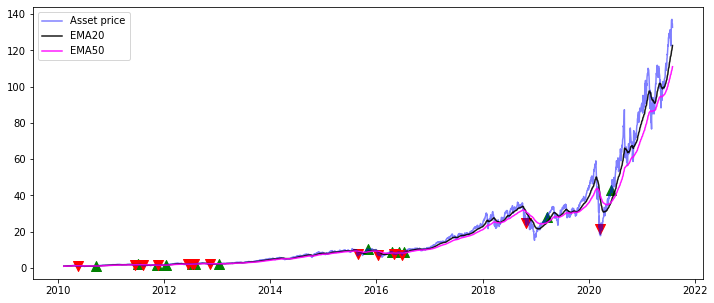

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df['Adj Close'], label='Asset price', c='blue', alpha=0.5)
plt.plot(df['EMA20'], label='EMA20', c='k', alpha=0.9)
plt.plot(df['EMA50'], label='EMA50', c='magenta', alpha=0.9)
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]['Adj Close'], marker='^', color='g', s=100)
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]['Adj Close'], marker='v', color='r', s=100)
plt.legend()
plt.show()